## Basics of Probability

In [ ]:
import random

# ------------------------------
# Part A: Tossing a coin 10,000 times
# ------------------------------
def coin_toss_simulation(trials=10000):
    heads = 0
    tails = 0
    
    for _ in range(trials):
        toss = random.choice(["H", "T"])
        if toss == "H":
            heads += 1
        else:
            tails += 1
    
    prob_heads = heads / trials
    prob_tails = tails / trials
    
    print("Coin Toss Simulation (10,000 trials)")
    print(f"Heads: {heads}, Probability: {prob_heads:.4f}")
    print(f"Tails: {tails}, Probability: {prob_tails:.4f}")
    print("-" * 50)


# ------------------------------
# Part B: Rolling two dice and computing probability of sum = 7
# ------------------------------
def dice_roll_simulation(trials=10000):
    sum_seven = 0
    
    for _ in range(trials):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        if die1 + die2 == 7:
            sum_seven += 1
    
    prob_sum_seven = sum_seven / trials
    
    print("Dice Roll Simulation (10,000 trials)")
    print(f"Sum = 7 occurred: {sum_seven} times")
    print(f"Experimental Probability of Sum = 7: {prob_sum_seven:.4f}")
    print("-" * 50)


# ------------------------------
# Run both simulations
# ------------------------------
if __name__ == "__main__":
    coin_toss_simulation()
    dice_roll_simulation()


In [1]:
import random

#!/usr/bin/env python3
"""
estimateProbability.py

Estimate the probability of getting at least one "6" in 10 rolls of a fair die
by Monte Carlo simulation.
"""



def estimate_prob_at_least_one_six(trials: int = 100_000) -> float:
    """
    Simulate `trials` experiments. In each experiment roll a fair die 10 times
    using a loop and count how many experiments contain at least one 6.
    Return the proportion of successful trials.
    """
    successes = 0
    for _ in range(trials):
        got_six = False
        for _ in range(10):
            if random.randint(1, 6) == 6:
                got_six = True
                break
        if got_six:
            successes += 1
    return successes / trials


if __name__ == "__main__":
    estimate = estimate_prob_at_least_one_six(100_000)
    print(f"Estimated probability of at least one 6 in 10 rolls: {estimate:.6f}")

Estimated probability of at least one 6 in 10 rolls: 0.836020


## Conditional Probability and Bayes' Theorem

In [6]:
import random
from collections import Counter

def simulate_bag(trials=1000, seed=None):
    """
    Simulate drawing with replacement from a bag:
    5 red (R), 7 green (G), 8 blue (B).
    Returns estimates for:
      - P(R_now | B_prev) from data
      - RHS of Bayes: P(B_prev | R_now) * P(R_now) / P(B_prev)
    """
    rng = random.Random(seed) if seed is not None else random
    bag = ["R"]*5 + ["G"]*7 + ["B"]*8  # total = 20

    # Generate the sequence of draws
    draws = [rng.choice(bag) for _ in range(trials)]

    # Adjacent pairs: (previous, current) for conditional probabilities
    pairs = list(zip(draws[:-1], draws[1:]))

    # Unconditional probabilities from all draws
    counts = Counter(draws)
    p_R = counts["R"] / trials
    p_B = counts["B"] / trials

    # Count transitions for conditionals
    prevB_total = sum(1 for p,_ in pairs if p == "B")                 # times previous was Blue
    prevB_and_currR = sum(1 for p,c in pairs if p == "B" and c == "R")# times prev Blue AND curr Red

    # LHS: direct estimate of P(R_now | B_prev)
    p_R_given_B = prevB_and_currR / prevB_total if prevB_total else float("nan")

    # P(B_prev | R_now) from the same pairs
    currR_total = sum(1 for _,c in pairs if c == "R")
    p_B_given_R = prevB_and_currR / currR_total if currR_total else float("nan")

    # Bayes RHS: P(B_prev | R_now) * P(R_now) / P(B_prev)
    rhs_bayes = (p_B_given_R * p_R / p_B) if p_B > 0 else float("nan")

    # (Optional) joint estimate for reference:
    p_joint = prevB_and_currR / max(len(pairs), 1)  # P(B_prev ∩ R_now)
    rhs_alt = p_joint / p_B if p_B > 0 else float("nan")  # equals P(R|B) by definition

    # Print results
    print(f"Trials: {trials}")
    print(f"Unconditional estimates:  P(R)≈{p_R:.4f}, P(B)≈{p_B:.4f}")
    print(f"Direct (data):           P(R_now | B_prev)≈{p_R_given_B:.4f}")
    print(f"Bayes (data):            P(B_prev|R_now)*P(R)/P(B)≈{rhs_bayes:.4f}")
    print(f"Via joint (data):        P(B_prev∩R_now)/P(B_prev)≈{rhs_alt:.4f}")
    print(f"Difference (LHS - RHS):  {p_R_given_B - rhs_bayes:+.4e}")

    # Theoretical values (with replacement → independence)
    p_R_theory = 5/20
    p_B_theory = 8/20
    print(f"Theoretical:              P(R)=0.2500, P(B)=0.4000, P(R|B_prev)=0.2500")

# Run it
if __name__ == "__main__":
    simulate_bag(trials=1000, seed=42)


Trials: 1000
Unconditional estimates:  P(R)≈0.2420, P(B)≈0.4050
Direct (data):           P(R_now | B_prev)≈0.2519
Bayes (data):            P(B_prev|R_now)*P(R)/P(B)≈0.2529
Via joint (data):        P(B_prev∩R_now)/P(B_prev)≈0.2521
Difference (LHS - RHS):  -1.0450e-03
Theoretical:              P(R)=0.2500, P(B)=0.4000, P(R|B_prev)=0.2500


## Random Variables and Discrete Probability

In [7]:
import numpy as np

def generate_and_summarize(n=1000, seed=42):
    rng = np.random.default_rng(seed)          # reproducible RNG
    values = np.array([1, 2, 3])
    probs  = np.array([0.25, 0.35, 0.40])      # must sum to 1

    # a) generate the sample
    sample = rng.choice(values, size=n, p=probs)

    # b) empirical mean, variance, std (population versions: ddof=0)
    mean = sample.mean()
    var  = sample.var(ddof=0)
    std  = sample.std(ddof=0)

    print(f"n = {n}")
    print(f"Empirical mean:      {mean:.4f}")
    print(f"Empirical variance:  {var:.4f}")
    print(f"Empirical std dev:   {std:.4f}")

    # (optional) unbiased sample variance/std (set ddof=1)
    # print(f"Sample variance(ddof=1): {sample.var(ddof=1):.4f}")
    # print(f"Sample std(ddof=1):      {sample.std(ddof=1):.4f}")

if __name__ == "__main__":
    generate_and_summarize()


n = 1000
Empirical mean:      2.1340
Empirical variance:  0.6420
Empirical std dev:   0.8013


## Continuous Random Variables

n = 2000
Empirical mean:     5.0750  (theory = 5.0000)
Empirical variance: 26.3474  (theory = 25.0000)
Empirical std dev:  5.1330  (theory = 5.0000)


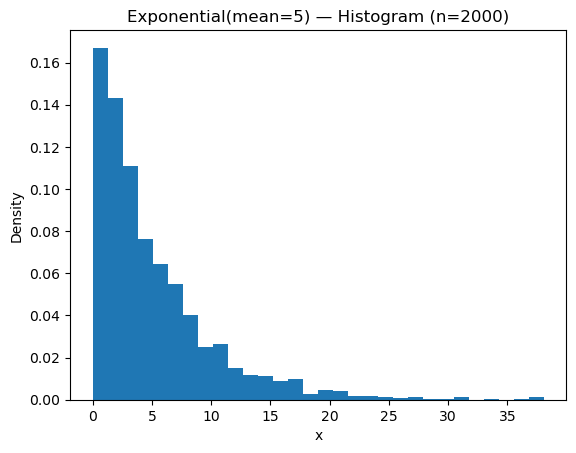

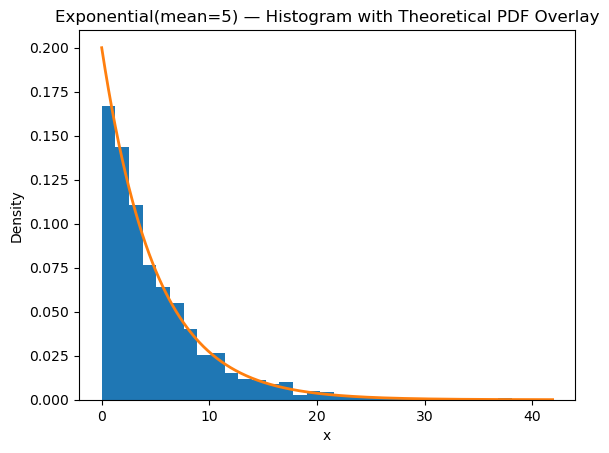

In [8]:
# exponential_sim.py
import numpy as np
import matplotlib.pyplot as plt

def simulate_and_plot(n=2000, mean=5.0, seed=42):
    """
    Simulate n samples from Exponential(mean=5) and visualize:
      a) histogram
      b) histogram with theoretical PDF overlay
    Also print empirical mean, variance, and standard deviation.
    """
    rng = np.random.default_rng(seed)

    # a) simulate samples: for exponential, scale parameter equals the mean
    samples = rng.exponential(scale=mean, size=n)

    # quick stats
    emp_mean = samples.mean()
    emp_var  = samples.var(ddof=0)  # population variance
    emp_std  = samples.std(ddof=0)

    print(f"n = {n}")
    print(f"Empirical mean:     {emp_mean:.4f}  (theory = {mean:.4f})")
    print(f"Empirical variance: {emp_var:.4f}  (theory = {mean**2:.4f})")
    print(f"Empirical std dev:  {emp_std:.4f}  (theory = {mean:.4f})")

    # x-grid and theoretical PDF: f(x) = (1/mean) * exp(-x/mean), x >= 0
    x_max = max(1e-9, samples.max()) * 1.1
    x = np.linspace(0, x_max, 400)
    pdf = (1 / mean) * np.exp(-x / mean)

    # b) histogram
    plt.figure()
    plt.hist(samples, bins=30, density=True)
    plt.title("Exponential(mean=5) — Histogram (n=2000)")
    plt.xlabel("x")
    plt.ylabel("Density")

    # histogram + PDF overlay
    plt.figure()
    plt.hist(samples, bins=30, density=True)
    plt.plot(x, pdf, linewidth=2)
    plt.title("Exponential(mean=5) — Histogram with Theoretical PDF Overlay")
    plt.xlabel("x")
    plt.ylabel("Density")

    plt.show()

if __name__ == "__main__":
    simulate_and_plot()


## Central Limit Theorem

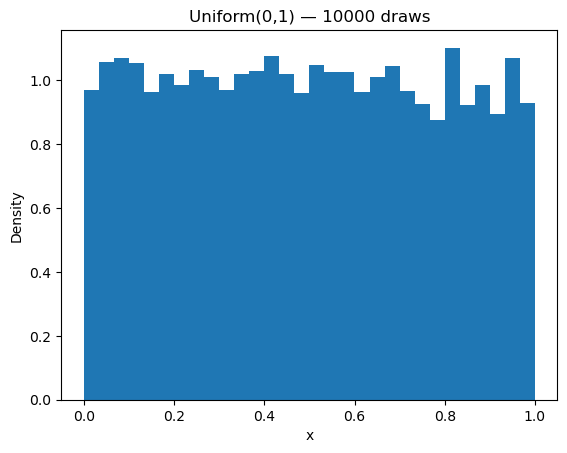

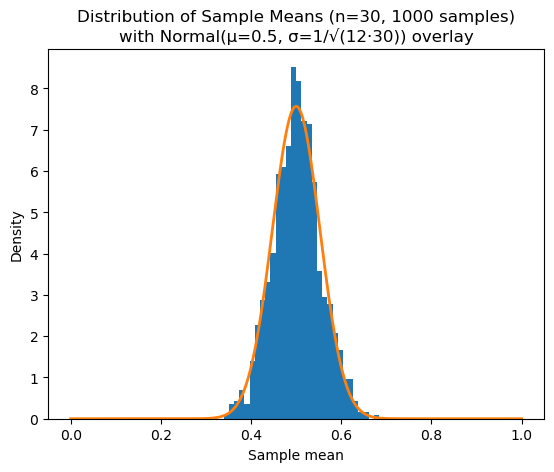

Uniform empirical mean ≈ 0.4942 (theory=0.5)
Uniform empirical var  ≈ 0.0827 (theory≈0.0833)
Means empirical mean   ≈ 0.5011 (theory=0.5)
Means empirical sd     ≈ 0.0532 (theory≈0.0527)


In [9]:
# clt_uniform_demo.py
import numpy as np
import matplotlib.pyplot as plt

def clt_demo(n_draws=10_000, n_samples=1000, n=30, seed=42):
    np.random.seed(seed)

    # a) 10,000 draws from Uniform(0,1) using numpy.random.uniform()
    uniform_data = np.random.uniform(low=0.0, high=1.0, size=n_draws)

    # b) 1000 samples of size n=30 from Uniform(0,1)
    samples = np.random.uniform(low=0.0, high=1.0, size=(n_samples, n))
    sample_means = samples.mean(axis=1)

    # --- Theory for Uniform(0,1) ---
    mu = 0.5
    var = 1/12
    sd_mean = np.sqrt(var / n)

    # c) Visualizations
    # 1) Histogram of the uniform data
    plt.figure()
    plt.hist(uniform_data, bins=30, density=True)
    plt.title(f"Uniform(0,1) — {n_draws} draws")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.show()

    # 2) Histogram of sample means with Normal(μ, σ/√n) overlay
    x = np.linspace(0, 1, 500)
    normal_pdf = (1/(sd_mean*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mu)/sd_mean)**2)

    plt.figure()
    plt.hist(sample_means, bins=30, density=True)
    plt.plot(x, normal_pdf, linewidth=2)
    plt.title(f"Distribution of Sample Means (n={n}, {n_samples} samples)\nwith Normal(μ=0.5, σ=1/√(12·{n})) overlay")
    plt.xlabel("Sample mean")
    plt.ylabel("Density")
    plt.show()

    # Quick numeric checks
    print(f"Uniform empirical mean ≈ {uniform_data.mean():.4f} (theory=0.5)")
    print(f"Uniform empirical var  ≈ {uniform_data.var(ddof=0):.4f} (theory≈{var:.4f})")
    print(f"Means empirical mean   ≈ {sample_means.mean():.4f} (theory=0.5)")
    print(f"Means empirical sd     ≈ {sample_means.std(ddof=0):.4f} (theory≈{sd_mean:.4f})")

if __name__ == "__main__":
    clt_demo()
